# 7. Analyzing the gridsearch results

## Exploring the results

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
df_grids = pd.read_csv(r"GridSearch\grid_cv_results.csv")
df_grids = df_grids.fillna("No limit") # the None is exported as NaN
df_grids["param_max_depth"] = df_grids["param_max_depth"].astype("str")


In [101]:
df_grids.columns

Index(['Unnamed: 0', 'mean_fit_time', 'std_fit_time', 'mean_score_time',
       'std_score_time', 'param_criterion', 'param_max_depth',
       'param_n_estimators', 'params', 'split0_test_f1', 'split1_test_f1',
       'split2_test_f1', 'split3_test_f1', 'split4_test_f1', 'mean_test_f1',
       'std_test_f1', 'rank_test_f1', 'split0_test_roc_auc',
       'split1_test_roc_auc', 'split2_test_roc_auc', 'split3_test_roc_auc',
       'split4_test_roc_auc', 'mean_test_roc_auc', 'std_test_roc_auc',
       'rank_test_roc_auc'],
      dtype='object')

In [102]:
cols = ["param_criterion", "param_max_depth","param_n_estimators", "mean_test_roc_auc", "mean_test_f1"]

In [103]:
df_grids[["mean_test_roc_auc", "rank_test_roc_auc"]].sort_values("rank_test_roc_auc")

,mean_test_roc_auc,rank_test_roc_auc
352,0.946181,1
181,0.946181,1
504,0.946081,3
333,0.946081,3
334,0.946032,5
...,...,...
361,0.887847,509
190,0.887847,509
362,0.882639,511
191,0.882639,511


In [104]:
# best grdisearch model

df_grids.iloc[161][cols]

param_criterion           gini
param_max_depth           15.0
param_n_estimators         500
mean_test_roc_auc     0.943105
mean_test_f1          0.873204
Name: 161, dtype: object

In [105]:
df_grids[cols].sort_values(["mean_test_f1", "param_n_estimators", "param_max_depth"], ascending=False)

,param_criterion,param_max_depth,param_n_estimators,mean_test_roc_auc,mean_test_f1
9,gini,No limit,500,0.943105,0.873204
161,gini,15.0,500,0.943105,0.873204
181,entropy,No limit,550,0.946181,0.872717
352,log_loss,No limit,550,0.946181,0.872717
162,gini,15.0,550,0.943849,0.872678
...,...,...,...,...,...
368,log_loss,2.0,400,0.897917,0.738133
192,entropy,2.0,150,0.892857,0.729811
363,log_loss,2.0,150,0.892857,0.729811
191,entropy,2.0,100,0.882639,0.723484


In [106]:
# mean f1 per split criterion

df_grids.pivot_table("mean_test_f1", index="param_criterion")

,mean_test_f1
param_criterion,
entropy,0.837497
gini,0.843021
log_loss,0.837497


In [107]:
df_grids.pivot_table("mean_test_roc_auc", index="param_criterion")

,mean_test_roc_auc
param_criterion,
entropy,0.932218
gini,0.931056
log_loss,0.932218


In [108]:
# which split methods are responsible for the lower scores

df_grids[df_grids["mean_test_f1"] < 0.8][["param_criterion"]].value_counts()

param_criterion
entropy            36
log_loss           36
gini               19
Name: count, dtype: int64

Visualizations

C:\Users\alber\AppData\Local\Temp\ipykernel_5468\1677941488.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(excluding_none, x="param_max_depth", y="mean_test_f1", palette="pastel")


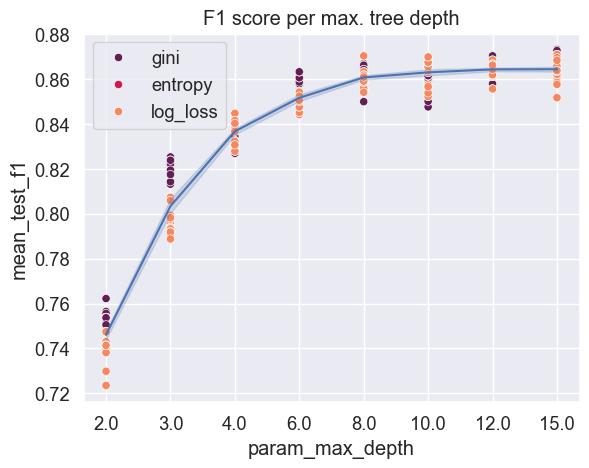

In [109]:
excluding_none = df_grids[df_grids["param_max_depth"] != "No limit"]

sns.scatterplot(excluding_none, x="param_max_depth", y="mean_test_f1", hue="param_criterion", palette="rocket")
sns.lineplot(excluding_none, x="param_max_depth", y="mean_test_f1", palette="pastel")
plt.title("F1 score per max. tree depth")
plt.show()


C:\Users\alber\AppData\Local\Temp\ipykernel_5468\203714143.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(excluding_none, x="param_max_depth", y="mean_test_roc_auc", palette="pastel")


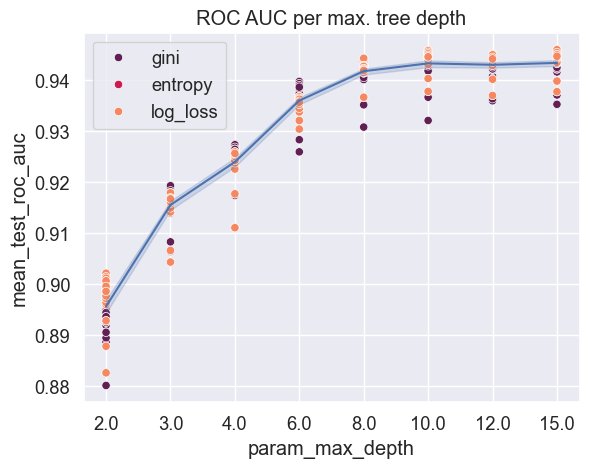

In [110]:
sns.scatterplot(excluding_none, x="param_max_depth", y="mean_test_roc_auc", hue="param_criterion", palette="rocket")
sns.lineplot(excluding_none, x="param_max_depth", y="mean_test_roc_auc", palette="pastel")
plt.title("ROC AUC per max. tree depth")
plt.show()

As we can see, the models' performance generally increases the deeper the tree and it stabilizes at a depth of 8 with little gain afterwards.

c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


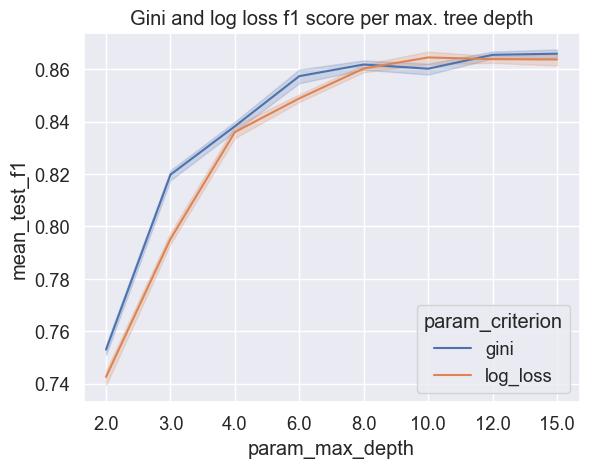

In [111]:
no_entropy_results = df_grids[(df_grids["param_criterion"] != "entropy") & (df_grids["param_max_depth"] != "No limit")]
# excluding entropy

sns.lineplot(no_entropy_results, x="param_max_depth", y="mean_test_f1", hue="param_criterion")
plt.title("Gini and log loss f1 score per max. tree depth")
plt.show()

c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Text(0.5, 1.0, 'Gini and log loss ROC AUC per max. tree depth')

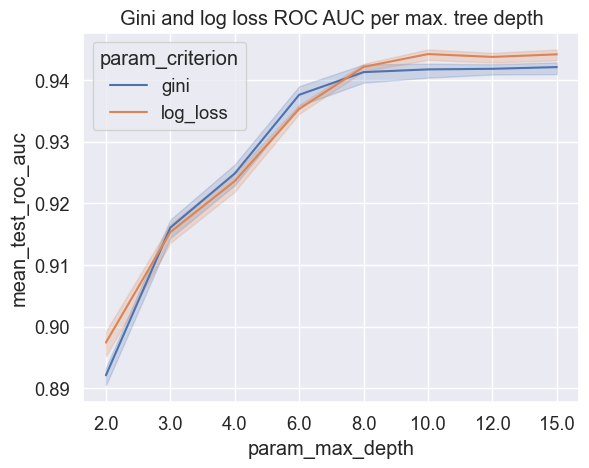

In [112]:
no_entropy_results = df_grids[(df_grids["param_criterion"] != "entropy") & (df_grids["param_max_depth"] != "No limit")]
# excluding entropy

sns.lineplot(no_entropy_results, x="param_max_depth", y="mean_test_roc_auc", hue="param_criterion")
plt.title("Gini and log loss ROC AUC per max. tree depth")

Comparing the performance of models depending on the splitting criterion and the max. depth of the trees, we can see that the log loss models peak at around depth 10 and the gini ones peak at the highest value. It is also noticeable that the gini models do better with shallower trees.

c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

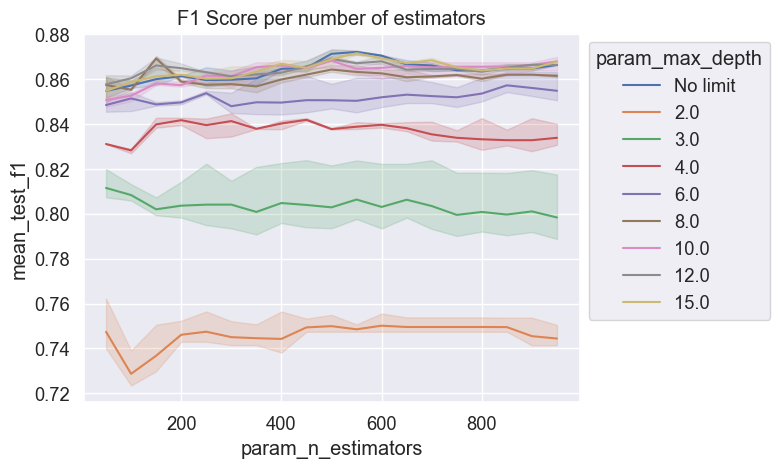

In [113]:
ax = sns.lineplot(df_grids, x="param_n_estimators", y="mean_test_f1", hue="param_max_depth")
plt.title("F1 Score per number of estimators")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

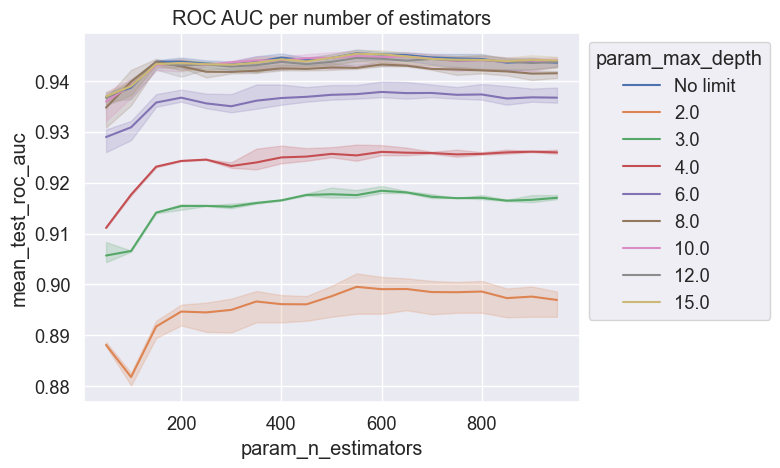

In [114]:
ax = sns.lineplot(df_grids, x="param_n_estimators", y="mean_test_roc_auc", hue="param_max_depth")
plt.title("ROC AUC per number of estimators")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

As far as the number of estimators, these don't cause major differences but we se a little spike at around 500 estimators for the forests with a maximum depth of 12 and up.

In [115]:
# table_results = df_grids[df_grids["param_criterion"] == "gini"].pivot_table("mean_test_f1", columns="param_n_estimators", index= "param_max_depth")
# table_results

In [116]:
# table_results_2 = df_grids[df_grids["param_criterion"] == "gini"].pivot_table("mean_test_neg_mean_squared_error", columns="param_n_estimators", index= "param_max_depth")
# table_results_2

## Final model

If we were to choose a final mode, we would probably go for a less complex model to avoid overfitting. Given our gridsearch, we know that we can reduce the complexity of our would-be final model without compromising much on either of our final metrics. 

We saw the f1 score and mse don't improve that much after a max depth of 8 so I'll look for a model with that characteristic

In [117]:
# np.unique(df_grids["param_max_depth"])

In [118]:
# df_grids[(df_grids["param_criterion"] == "gini") & (df_grids["param_max_depth"] == '8.0')][cols]

These models barely change in terms of F1 so I will not be prioritizing such a marginal gain.  

In [119]:
# final_options = df_grids[(df_grids["param_criterion"] == "gini") & (df_grids["param_max_depth"] == '8.0')][cols].sort_values("param_n_estimators")
# final_options

If we order them based on their number of estimators, the third one seems like a reasonable choice given the metric scores.